In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#np.set_printoptions(threshold='nan')

In [2]:
cv2.__version__

'3.4.3'

In [3]:
img = cv2.imread('fibers.png',2)

print(img.shape)

(824, 878)


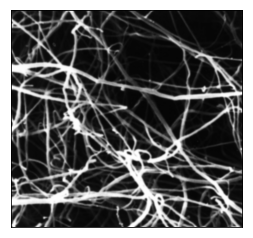

In [4]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') #Look through different interpolations
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

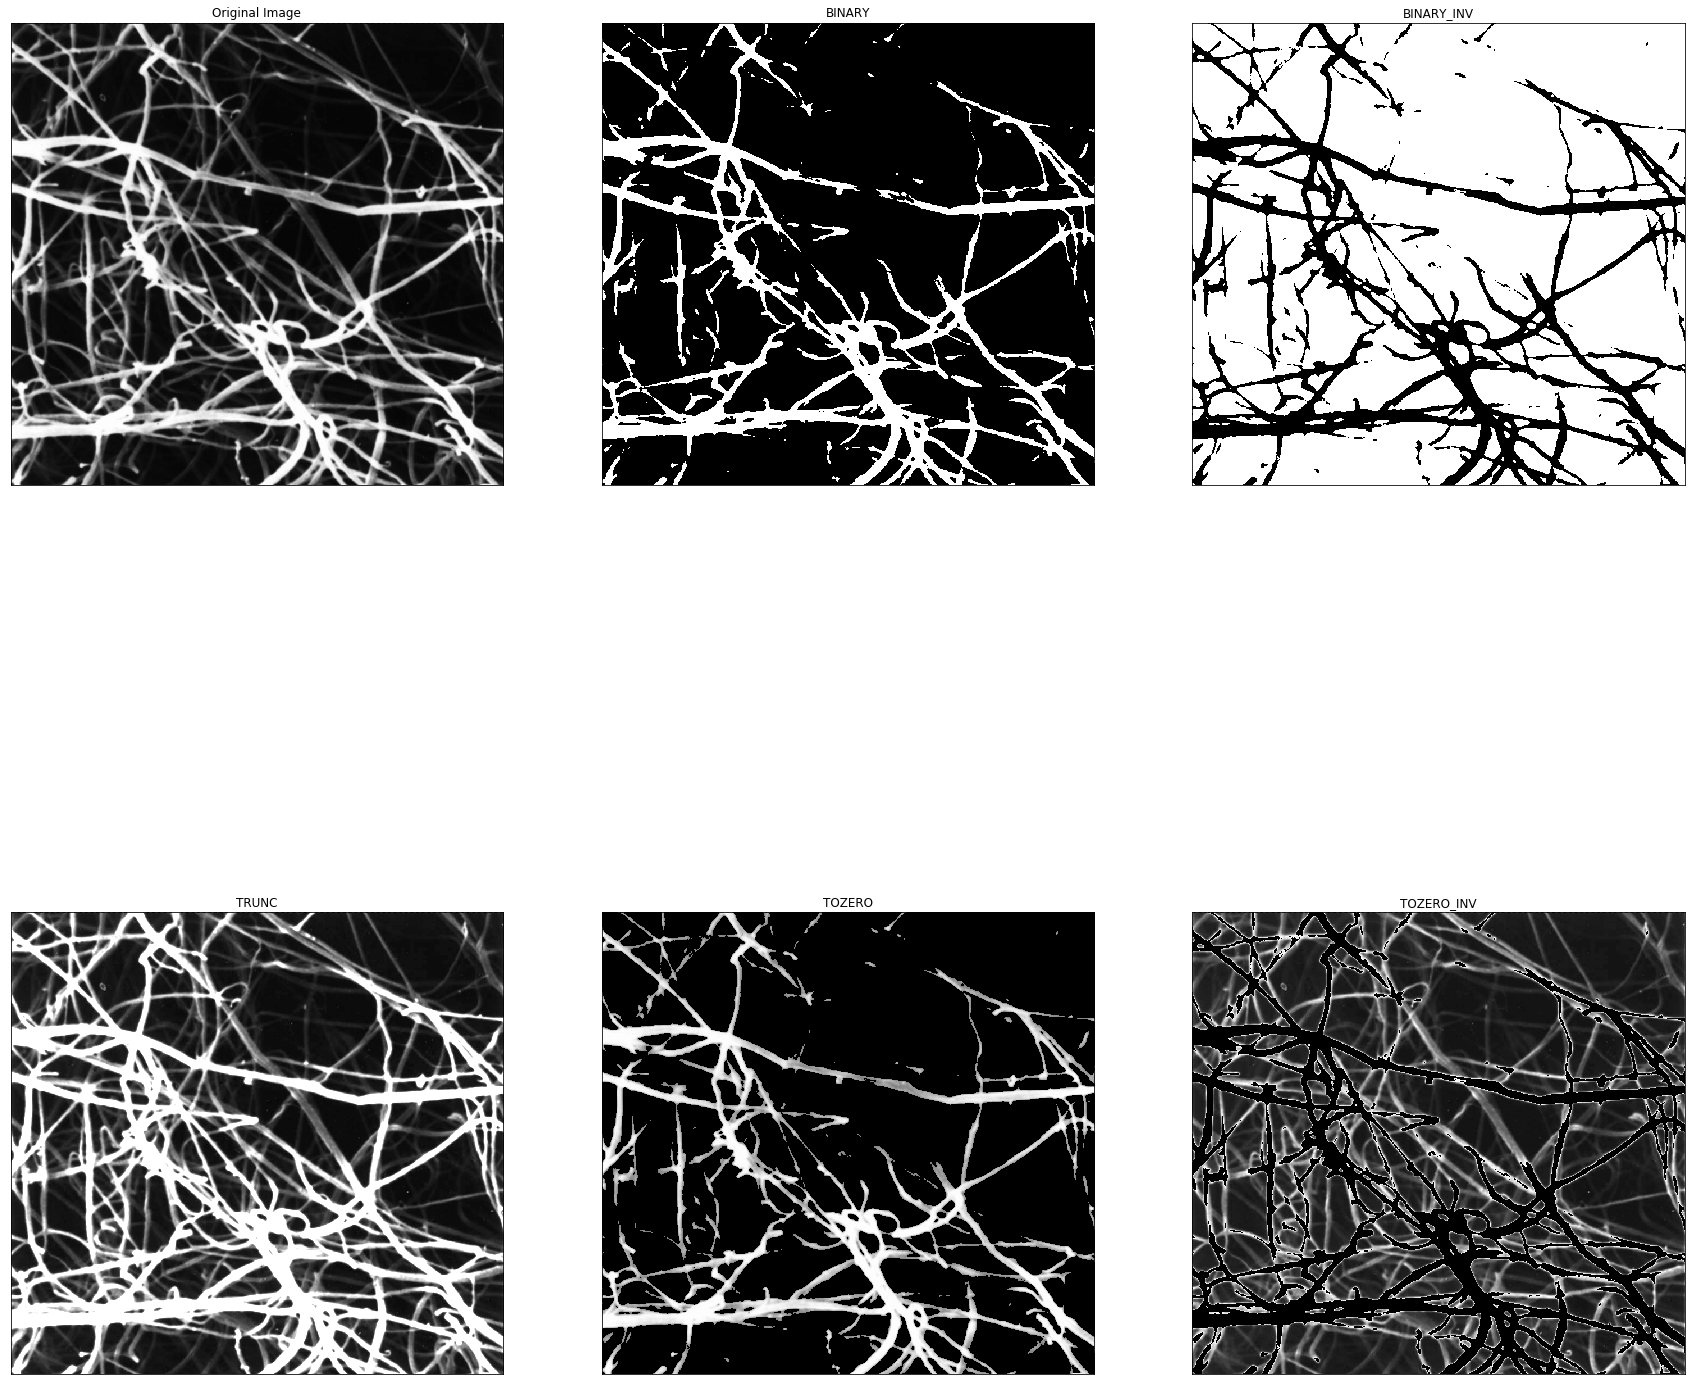

In [5]:
ret,thresh1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

f = plt.figure(figsize=[30,30])
#ax = f.add_subplot()
l = [231,232,233,234,235,236]

for i in range(6):

    ax = f.add_subplot(l[i])
    #plt.subplot(2,3,i+1,figsize=(10,10))
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

True

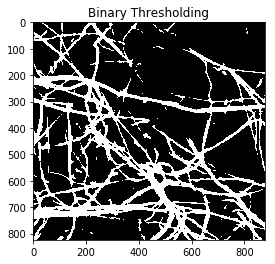

In [15]:
ret,thresh1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,'gray')
plt.title('Binary Thresholding')
cv2.imwrite('thresh1.png',thresh1)


In [16]:
imh = len(thresh1)
di=0
j=350
for i in range(imh-1):
    #print("i: " ,img[10][i])
    #print("i+1: ",img[10][i+1])
    #print("diff: ",img[10][i]-img[10][i+1])
    if(img[j][i]>img[j][i+1]):
        if(img[j][i]-img[j][i+1]>30):
            di+=1
    else:
        if(img[j][i+1]-img[j][i]>30):
            di+=1
print(di/2)

10.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[255.   0.   0.]
  [255.   0.   0.]
  [255.   0.   0.]
  ...
  [255.   0.   0.]
  [255.   0.   0.]
  [255.   0.   0.]]

 [[255.   0.   0.]
  [255.   0.   0.]
  [255.   0.   0.]
  ...
  [255.   0.   0.]
  [255.   0.   0.]
  [255.   0.   0.]]

 [[255.   0.   0.]
  [255.   0.   0.]
  [255.   0.   0.]
  ...
  [255.   0.   0.]
  [255.   0.   0.]
  [255.   0.   0.]]

 ...

 [[ 89.  89.  89.]
  [ 86.  86.  86.]
  [255.   0.   0.]
  ...
  [ 42.  42.  42.]
  [255.   0.   0.]
  [255.   0.   0.]]

 [[ 56.  56.  56.]
  [ 58.  58.  58.]
  [255.   0.   0.]
  ...
  [ 40.  40.  40.]
  [255.   0.   0.]
  [255.   0.   0.]]

 [[ 40.  40.  40.]
  [ 44.  44.  44.]
  [255.   0.   0.]
  ...
  [ 38.  38.  38.]
  [ 42.  42.  42.]
  [ 60.  60.  60.]]]


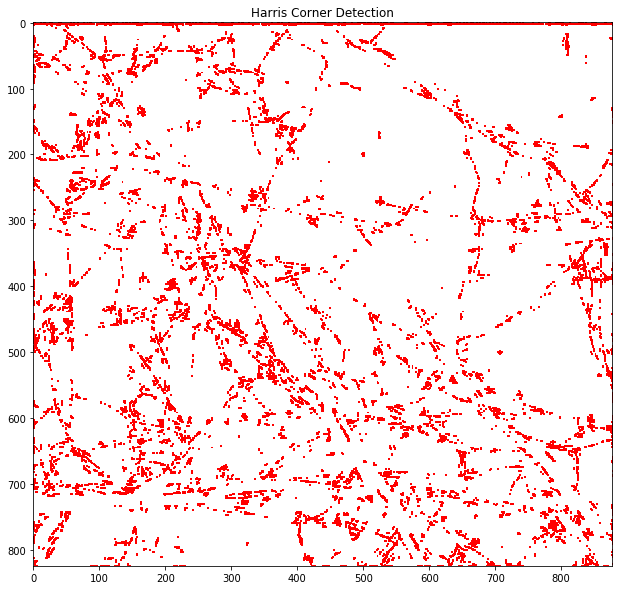

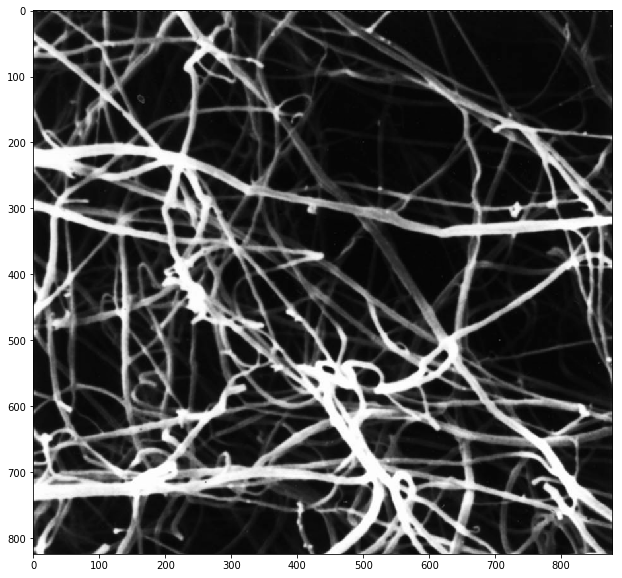

In [32]:

#thresh1 = np.float32(thresh1)
img = np.float32(img)

#dst = cv2.cornerHarris(thresh1,2,3,0.04)
dst = cv2.cornerHarris(img,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
#print(dst)
#bgr = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2BGR)
bgr = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
# Threshold for an optimal value, it may vary depending on the image.
bgr[dst>0.0001*dst.max()]=[255,0,0]
print(bgr)

plt.figure(figsize=[20,10])
plt.imshow(bgr,'prism')
#plt.imshow(dst,'Reds')
plt.title('Harris Corner Detection')

plt.figure(figsize=[20,10])
plt.imshow(img,'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


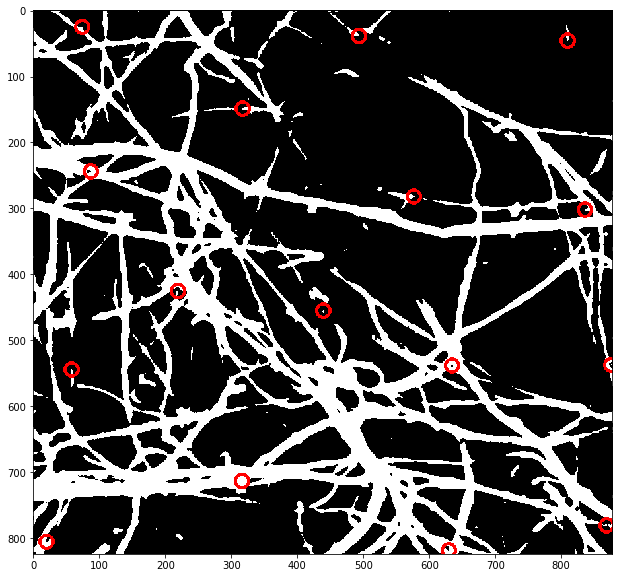

In [31]:

corners = cv2.goodFeaturesToTrack(thresh1,100,0.1,200)
corners = np.int0(corners)

bgr = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2BGR)

circlecolor = [255,0,0]
for i in corners:
    x,y = i.ravel()
    cv2.circle(bgr,(x,y),10,circlecolor,3)
    
plt.figure(figsize=[20,10])
plt.imshow(bgr)
plt.show()

In [19]:
img1 = thresh1          # queryImage
img2 = cv2.imread('train1.png',0) # trainImage

img1 = np.float32(img1)
img2 = np.float32(img2)
bgr = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
bgrtrain = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(bgr,None)
kp2, des2 = orb.detectAndCompute(bgrtrain,None)

In [20]:
# create BFMatcher object
#bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)
# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(bgr,kp1,bgrtrain,kp2,matches[:10], flags=2)

plt.imshow(img3)
plt.show()

error: OpenCV(3.4.3) /io/opencv/modules/core/src/batch_distance.cpp:238: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'batchDistance'
